In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pymongo import MongoClient

In [24]:
def rand_com_data():
    mongo = MongoClient(port=27017)
    stock_db = mongo['stocks']
    nasdaq = stock_db["nasdaq"]

    query = {'IPO Year': {"$lt":2020}}
    field = {'Symbol':1}
    total = nasdaq.count_documents(query)

    random_index = np.random.randint(total-1)
    results = nasdaq.find(query, field)

    rand_com = results[random_index]['Symbol']
    rand_ticker = yf.Ticker(rand_com)
    df = rand_ticker.history(period="12mo").reset_index()
    datetime_series = pd.to_datetime(df.Date)

    # Extract the date part (without time)
    date_series = datetime_series.dt.date.to_list()
    date = datetime_series.dt.strftime('%Y-%m-%d').to_list()

    #randomly choose one of the four prices as that day's final share price
    #because when we check share prices, we only check it for a short period and time and come bace later again
    #this is to simulate that
    all_data = [df.Open.to_list(),df.High.to_list(),df.Low.to_list(), df.Close.to_list()]
    rand_idx = np.random.randint(len(all_data)-1)
    data=[]

    for i in range (len(date_series)):
        data.append(round(all_data[rand_idx][i],2))

    return datetime_series, data, date


In [25]:
date_series, data, date = rand_com_data()
date


['2023-04-03',
 '2023-04-04',
 '2023-04-05',
 '2023-04-06',
 '2023-04-10',
 '2023-04-11',
 '2023-04-12',
 '2023-04-13',
 '2023-04-14',
 '2023-04-17',
 '2023-04-18',
 '2023-04-19',
 '2023-04-20',
 '2023-04-21',
 '2023-04-24',
 '2023-04-25',
 '2023-04-26',
 '2023-04-27',
 '2023-04-28',
 '2023-05-01',
 '2023-05-02',
 '2023-05-03',
 '2023-05-04',
 '2023-05-05',
 '2023-05-08',
 '2023-05-09',
 '2023-05-10',
 '2023-05-11',
 '2023-05-12',
 '2023-05-15',
 '2023-05-16',
 '2023-05-17',
 '2023-05-18',
 '2023-05-19',
 '2023-05-22',
 '2023-05-23',
 '2023-05-24',
 '2023-05-25',
 '2023-05-26',
 '2023-05-30',
 '2023-05-31',
 '2023-06-01',
 '2023-06-02',
 '2023-06-05',
 '2023-06-06',
 '2023-06-07',
 '2023-06-08',
 '2023-06-09',
 '2023-06-12',
 '2023-06-13',
 '2023-06-14',
 '2023-06-15',
 '2023-06-16',
 '2023-06-20',
 '2023-06-21',
 '2023-06-22',
 '2023-06-23',
 '2023-06-26',
 '2023-06-27',
 '2023-06-28',
 '2023-06-29',
 '2023-06-30',
 '2023-07-03',
 '2023-07-05',
 '2023-07-06',
 '2023-07-07',
 '2023-07-

In [62]:

msft = yf.Ticker("amzn")

# Download MSFT stock data
msft.history(period="12mo")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-29 00:00:00-04:00,98.690002,100.419998,98.559998,100.250000,49783300,0.0,0.0
2023-03-30 00:00:00-04:00,101.550003,103.040001,101.010002,102.000000,53633400,0.0,0.0
2023-03-31 00:00:00-04:00,102.160004,103.489998,101.949997,103.290001,56750300,0.0,0.0
2023-04-03 00:00:00-04:00,102.300003,103.290001,101.430000,102.410004,41135700,0.0,0.0
2023-04-04 00:00:00-04:00,102.750000,104.199997,102.110001,103.949997,48662500,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-22 00:00:00-04:00,177.750000,179.259995,176.750000,178.869995,27964100,0.0,0.0
2024-03-25 00:00:00-04:00,178.009995,180.990005,177.240005,179.710007,29815500,0.0,0.0
2024-03-26 00:00:00-04:00,180.149994,180.449997,177.949997,178.300003,29659000,0.0,0.0


In [5]:
msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'fullExchangeName': 'NasdaqGS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 511108200,
 'regularMarketTime': 1711656001,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 420.72,
 'fiftyTwoWeekHigh': 421.87,
 'fiftyTwoWeekLow': 419.14,
 'regularMarketDayHigh': 421.87,
 'regularMarketDayLow': 419.14,
 'regularMarketVolume': 21711778,
 'chartPreviousClose': 275.23,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1711612800,
   'end': 1711632600,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1711632600,
   'end': 1711656000,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1711656000,
   'end': 1711670400,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '12mo',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  

In [4]:
msft.income_stmt

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,211380035.679101,-3415860000.0,1839997169.143666,287626230.457441
Tax Rate For Calcs,0.189579,0.21,0.12558,0.118413
Normalized EBITDA,88287000000.0,54618000000.0,59741000000.0,48647000000.0
Total Unusual Items,1115000000.0,-16266000000.0,14652000000.0,2429000000.0
Total Unusual Items Excluding Goodwill,1115000000.0,-16266000000.0,14652000000.0,2429000000.0
Net Income From Continuing Operation Net Minority Interest,30425000000.0,-2722000000.0,33364000000.0,21331000000.0
Reconciled Depreciation,48663000000.0,41921000000.0,34433000000.0,25251000000.0
Reconciled Cost Of Revenue,480980000000.0,446343000000.0,403507000000.0,334564000000.0
EBITDA,89402000000.0,38352000000.0,74393000000.0,51076000000.0
EBIT,40739000000.0,-3569000000.0,39960000000.0,25825000000.0


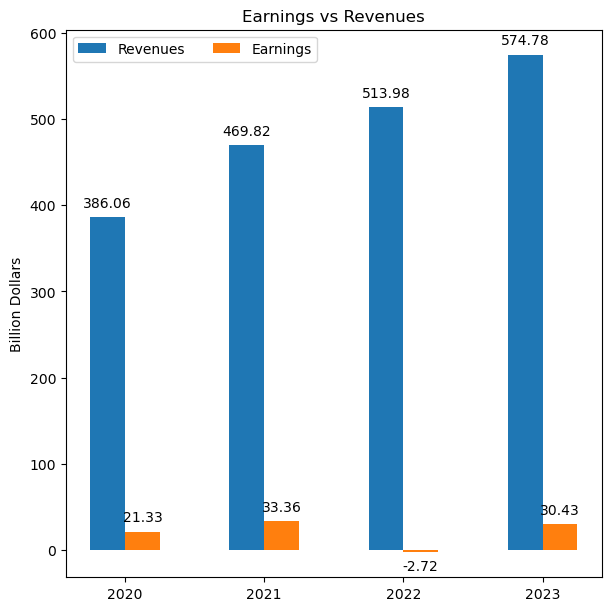

In [43]:
dates = msft.income_stmt.columns.to_list()
date_labels = ['2020', '2021', '2022', '2023']
revenues = []
earnings = []
for date in reversed(dates):
    revenues.append(round((msft.income_stmt[date]['Total Revenue']/1000000000), 2))
    earnings.append(round((msft.income_stmt[date]['Net Income']/1000000000),2))
data = {'Revenues': revenues, 'Earnings': earnings}

x = np.arange(len(dates))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(6, 6))

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x+offset, measurement, width=width, label=attribute)
    ax.bar_label(rects, padding=5)
    multiplier += 1


ax.set_ylabel('Billion Dollars')
ax.set_title("Earnings vs Revenues")
ax.set_xticks(x+width/2, date_labels)
ax.legend(loc='upper left', ncols=2)
if (min(min(earnings), min(revenues)) > 0 ):
    ax.set_ylim(0, max(max(earnings), max(revenues))*1.15)
#plt.subplots_adjust(hspace=0.5)
plt.show()

In [4]:
msft.quarterly_income_stmt

,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Tax Effect Of Unusual Items,-29160000.0,-20700000.0,20855987.382214,30780000.0,-44080000.0
Tax Rate For Calcs,0.18,0.18,0.187892,0.19,0.19
Normalized EBITDA,33556000000.0,31845000000.0,28972000000.0,26556000000.0,24709000000.0
Total Unusual Items,-162000000.0,-115000000.0,111000000.0,162000000.0,-232000000.0
Total Unusual Items Excluding Goodwill,-162000000.0,-115000000.0,111000000.0,162000000.0,-232000000.0
Net Income From Continuing Operation Net Minority Interest,21870000000.0,22291000000.0,20081000000.0,18299000000.0,16425000000.0
Reconciled Depreciation,5959000000.0,3921000000.0,3874000000.0,3549000000.0,3648000000.0
Reconciled Cost Of Revenue,19623000000.0,16302000000.0,16795000000.0,16128000000.0,17488000000.0
EBITDA,33394000000.0,31730000000.0,29083000000.0,26718000000.0,24477000000.0
EBIT,27435000000.0,27809000000.0,25209000000.0,23169000000.0,20829000000.0


In [29]:
msft.info

{'address1': 'Commonwealth Bank Place South',
 'address2': 'Level 1 11 Harbour Street',
 'city': 'Sydney',
 'state': 'NSW',
 'zip': '2000',
 'country': 'Australia',
 'phone': '61 2 9378 2000',
 'fax': '61 2 9118 7192',
 'website': 'https://www.commbank.com.au',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Commonwealth Bank of Australia provides financial services in Australia, New Zealand, and internationally. It operates through Retail Banking Services, Business Banking, Institutional Banking and Markets, and New Zealand segments. The company offers transaction, savings, and foreign currency accounts; term deposits; personal and business loans; overdrafts; equipment finance; credit cards; international payment and trade; and private banking services, as well as home and car loans. It also 

In [34]:
stock = msft
check_list = stock.info.keys()
keys = ['previousClose', 'open', 'dayLow', 'dayHigh', 'fiftyTwoWeekLow',
        'fiftyTwoWeekHigh', 'volume','averageVolume', 'marketCap', 'beta', 
        'trailingPE', 'debtToEquity', 'profitMargins', 'trailingEps']
return_list = []
for key in keys:
    if key in check_list:
        return_list.append(stock.info[key])
return_list

# temp = [
#     {'Previous close': stock.info['previousClose']},
#     {'Open': stock.info['open']},
#     {'Day range': f"{stock.info['dayLow']} - {stock.info['dayHigh']}"},
#     {'52-week range': f"{stock.info['fiftyTwoWeekLow']} - {stock.info['fiftyTwoWeekHigh']}"},
#     {'Volumn': stock.info['volume']},
#     {'Avg. volumn': stock.info['averageVolume']},
#     {'Market cap': f"{round((stock.info['marketCap']/1000000000),3)}B"},
#     {'Beta (5Y monthly)': stock.info['beta']},
#     {'PE raio(TTM)': round(stock.info['trailingPE'],2)},
#     {'Debt/equity': round(stock.info['debtToEquity'],2)},
#     {'Profit Margins': round(stock.info['profitMargins'],2)},
#     {'EPS(TTM)': stock.info['trailingEps']}
#     ]


#data = [{key: value} for key, value in temp.items()]   
#data

[120.0,
 120.56,
 119.4,
 120.56,
 94.37,
 121.54,
 2665942,
 2122032,
 201355280384,
 0.904,
 20.928696,
 0.37037,
 5.75]

In [7]:
msft.get_shares_full(start="2022-01-01", end=None)

2022-01-27 00:00:00-05:00    7496869888
2022-02-04 00:00:00-05:00    7800719872
2022-02-05 00:00:00-05:00    7496869888
2022-02-11 00:00:00-05:00    7496869888
2022-03-04 00:00:00-05:00    7605040128
                                ...    
2024-03-26 00:00:00-04:00    7446459904
2024-03-26 00:00:00-04:00    7528840192
2024-03-27 00:00:00-04:00    7430439936
2024-03-29 00:00:00-04:00    7430439936
2024-03-29 00:00:00-04:00    7443680256
Length: 156, dtype: int64

In [8]:
msft.balance_sheet

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Ordinary Shares Number,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Share Issued,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Net Debt,12533000000.0,35850000000.0,43922000000.0,49751000000.0
Total Debt,59965000000.0,61270000000.0,67775000000.0,70998000000.0
Tangible Book Value,128971000000.0,87720000000.0,84477000000.0,67915000000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,111256000000.0,104749000000.0,130256000000.0,136527000000.0
Other Short Term Investments,76552000000.0,90818000000.0,116032000000.0,122951000000.0
Cash And Cash Equivalents,34704000000.0,13931000000.0,14224000000.0,13576000000.0
Cash Equivalents,26226000000.0,5673000000.0,6952000000.0,7666000000.0


In [10]:
msft.recommendations_summary

,period,strongBuy,buy,hold,sell,strongSell
0,0m,14,13,6,0,1
1,-1m,21,30,4,0,0
2,-2m,20,30,4,0,0
3,-3m,20,27,6,0,0


In [8]:
msft = yf.Ticker("col.ax")
msft.news

[{'uuid': '943ac39a-b2fd-3ae5-9fdb-32b81710253f',
  'title': 'AT&T says leaked data set impacts about 73 million current, former account holders',
  'publisher': 'Reuters',
  'link': 'https://finance.yahoo.com/news/t-says-leaked-data-set-142120306.html',
  'providerPublishTime': 1711808480,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/j34GFfbyeQgUQiLwO8vJBQ--~B/aD01MTA7dz04MDA7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/en/reuters-finance.com/6990e56e7f484797907f88d104947c92',
     'width': 800,
     'height': 510,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/fpklz.WOFum3EaLJn_DAzg--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/reuters-finance.com/6990e56e7f484797907f88d104947c92',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['T']},
 {'uuid': '9fa178f8-3e8b-38cd-828b-33e117fa1107',
  'title': 'Second ship with aid bound for Gaza 

In [3]:
for news in msft.news:
    print(news.keys())

dict_keys(['uuid', 'title', 'publisher', 'link', 'providerPublishTime', 'type', 'thumbnail', 'relatedTickers'])
dict_keys(['uuid', 'title', 'publisher', 'link', 'providerPublishTime', 'type', 'thumbnail', 'relatedTickers'])
dict_keys(['uuid', 'title', 'publisher', 'link', 'providerPublishTime', 'type', 'thumbnail', 'relatedTickers'])
dict_keys(['uuid', 'title', 'publisher', 'link', 'providerPublishTime', 'type', 'thumbnail', 'relatedTickers'])
dict_keys(['uuid', 'title', 'publisher', 'link', 'providerPublishTime', 'type', 'thumbnail', 'relatedTickers'])
dict_keys(['uuid', 'title', 'publisher', 'link', 'providerPublishTime', 'type', 'thumbnail', 'relatedTickers'])
dict_keys(['uuid', 'title', 'publisher', 'link', 'providerPublishTime', 'type', 'thumbnail', 'relatedTickers'])
dict_keys(['uuid', 'title', 'publisher', 'link', 'providerPublishTime', 'type', 'thumbnail', 'relatedTickers'])


In [7]:
data = []
for news in msft.news:
        if ('thumbnail' in news.keys()):
            data.append([{'url': news['thumbnail']['resolutions'][0]['url']},
                        {'title': news['title']}])
        else:
            data.append([{'url': 'no'},
                        {'title': news['title']}])
data


[[{'url': 'https://s.yimg.com/uu/api/res/1.2/HZeoJ8.sK4ZIqdhuKhGSLQ--~B/aD01NzI7dz0xMTE5O2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/67d8022baa795c37d0fdd029d7ce1dcb'},
  {'title': "Dow Jones Futures: Will Market Rally On 'Good' Inflation Data? Nvidia AI Chip Peer Works On Base"}],
 [{'url': 'https://s.yimg.com/uu/api/res/1.2/FsP1g3fbT0G1LwSHbUxY6g--~B/aD03ODc7dz0xNDAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/motleyfool.com/1f917265a02219b4c5369b44d8fb1fdc'},
  {'title': 'These Tech Titans Are Teaming Up Against Nvidia'}],
 [{'url': 'https://s.yimg.com/uu/api/res/1.2/uvpG5SNbzg.aDnUCar8C9w--~B/aD03ODc7dz0xNDAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/motleyfool.com/290f9562c481574bbc3ce7808e93cc91'},
  {'title': 'The 5 Reasons I Sold Adobe Stock'}],
 [{'url': 'https://s.yimg.com/uu/api/res/1.2/UXaVkkYfh5Eny3yK88nDqQ--~B/aD0xMDgwO3c9MTkyMDthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/motleyfool.com/d2af2cbe72e93b19ab0d228a812feeb0'},
  {'title': 'Real Estate N